In [1]:
# William Gunawan, Kenji Nakachi, Andrew Fortner, Kate Zhang

<h1> Overview </h1>

We chose the Airline Passenger Satisfaction Dataset from Kaggle (https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction).\
The features are described in the next section *Column Context*.\
Our goal is to predict "Customer Satisfcation" given all of the other features. 

<h2>Column Context:</h2>

*Gender:* Gender of the passengers **(Female, Male)**

*Customer Type:* The customer type **(Loyal customer, disloyal customer)**

*Age:* The actual age of the passengers **(years)**

*Type of Travel:* Purpose of the flight of the passengers **(Personal Travel, Business Travel)**

*Class:* Travel class in the plane of the passengers **(Business, Eco, Eco Plus)**

*Flight distance:* The flight distance of this journey **(miles)**

*Inflight wifi service:* Satisfaction level **(0:Not Applicable;1-5)**

*Departure/Arrival time convenient:* Satisfaction level **(0:Not Applicable;1-5)**

*Ease of Online booking:* Satisfaction level **(0:Not Applicable;1-5)**

*Gate location:* Satisfaction level **(0:Not Applicable;1-5)**

*Food and drink:* Satisfaction level **(0:Not Applicable;1-5)**

*Online boarding:* Satisfaction level **(0:Not Applicable;1-5)**

*Seat comfort:* Satisfaction level **(0:Not Applicable;1-5)**

*Inflight entertainment:* Satisfaction level **(0:Not Applicable;1-5)**

*On-board service:* Satisfaction level **(0:Not Applicable;1-5)**

*Leg room service:* Satisfaction level **(0:Not Applicable;1-5)**

*Baggage handling:* Satisfaction level **(0:Not Applicable;1-5)**

*Check-in service:* Satisfaction level **(0:Not Applicable;1-5)**

*Inflight service:* Satisfaction level **(0:Not Applicable;1-5)**

*Cleanliness:* Satisfaction level **(0:Not Applicable;1-5)**

*Departure Delay in Minutes:* Minutes delayed when departure **(Minutes)**

*Arrival Delay in Minutes:* Minutes delayed when Arrival **(Minutes)**

*Satisfaction:* Airline satisfaction level **(Satisfaction, neutral or dissatisfaction)**

In [51]:
# Import packages
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.metrics as metrics
import sklearn.neural_network
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import MDS
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

from matplotlib import pyplot
from scipy.stats import chi2_contingency
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from scipy.spatial.distance import pdist

In [2]:
# Download data
data = pd.read_csv("https://raw.githubusercontent.com/katezhang1234/ML_Airline_Project/main/train.csv")
data.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


<h1> Step 1: Data Cleaning </h1>
<h3> 1.1: Remove Unnecessary Columns </h3>

We don't want to use features like *ID* in our classification, so we drop these unnecessary features

In [3]:
# Check for duplicated rows
print("Duplicated IDs: ",data['id'].duplicated().sum())

# Drop id and Unnamed columns -- we do not want to use these as features
data = data.drop(['Unnamed: 0', 'id'], axis=1)
data.head(5)

Duplicated IDs:  0


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


<h3> 1.2: Encoding Categorical Values </h3>

In order to impute missing values, we need to encode our categorical values into numerical values.

In [4]:
# One hot encoding of categorical variables
categorical_variables = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

df_encoded = pd.get_dummies(data, columns=categorical_variables)
df_encoded.drop(['Gender_Female', 'Customer Type_disloyal Customer', 'Type of Travel_Business travel', 'Class_Eco', 'Class_Eco Plus', 'satisfaction_neutral or dissatisfied'], axis=1, inplace=True)

labels = df_encoded['satisfaction_satisfied']
df_encoded.drop(['satisfaction_satisfied'], axis=1, inplace=True)

# Print the first five rows of the encoded DataFrame
df_encoded.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel,Class_Business
0,13,460,3,4,3,1,5,3,5,5,...,4,4,5,5,25,18.0,1,1,1,0
1,25,235,3,2,3,3,1,3,1,1,...,3,1,4,1,1,6.0,1,0,0,1
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,4,5,0,0.0,0,1,0,1
3,25,562,2,5,5,5,2,2,2,2,...,3,1,4,2,11,9.0,0,1,0,1
4,61,214,3,3,3,3,4,5,5,3,...,4,3,3,3,0,0.0,1,1,0,1


In [5]:
# Check for missing values
nan_count = df_encoded.isna().sum().sum()
arrival_nan = df_encoded['Arrival Delay in Minutes'].isna().sum()
print("Training set missing values = ", nan_count)
print("Arrival column missing values = ", arrival_nan)
df_encoded[df_encoded.isna().any(axis=1)]

Training set missing values =  310
Arrival column missing values =  310


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel,Class_Business
213,38,109,5,3,3,3,5,5,5,5,...,4,1,1,5,31,NaN,0,1,0,0
1124,53,1012,3,2,3,4,4,3,4,4,...,4,3,3,4,38,NaN,1,1,1,0
1529,39,733,2,5,5,5,2,4,3,2,...,2,2,2,3,11,NaN,1,1,0,1
2004,26,1035,3,3,3,1,2,3,2,2,...,4,5,5,2,41,NaN,0,0,0,1
2108,24,417,2,1,2,2,5,2,5,5,...,2,1,2,5,1,NaN,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,49,1249,2,5,2,3,2,3,3,3,...,4,3,4,3,230,NaN,1,1,1,0
102384,58,733,3,3,3,3,3,3,3,3,...,2,4,2,3,55,NaN,1,1,0,0
102552,29,1107,2,1,1,1,5,1,3,5,...,5,5,3,5,0,NaN,0,0,0,0
102960,58,1088,4,4,1,1,5,4,5,5,...,5,5,3,5,0,NaN,1,1,0,0


In [7]:
# Check for invalid satisfaction scores (not 0-5)
features = df_encoded.columns.tolist()
satisfy_features = features[2:16]
invalid_5 = (df_encoded[satisfy_features] > 5).any(axis = 1)
invalid_0 = (df_encoded[satisfy_features] < 0).any(axis = 1)

print("Records with any satisfaction score > 5: ", invalid_5.values.sum())
print(invalid_5.value_counts(), "\n")
print("Records with any satisfaction score < 0: ", invalid_0.values.sum())
print(invalid_0.value_counts())

Records with any satisfaction score > 5:  0
False    103904
dtype: int64 

Records with any satisfaction score < 0:  0
False    103904
dtype: int64


<h3>1.3 Split Into Test & Train Sets & Impute Missing Data</h3>

In [6]:
# split data
X_train, X_test, y_train, y_test = train_test_split(df_encoded, labels, test_size=0.2, random_state=42)

# Impute Arrival Delay in Minutes column with mean
# We're only doing this column since this is the only column with NaN values (seen from above)
mean_value_train = X_train['Arrival Delay in Minutes'].mean()
X_train['Arrival Delay in Minutes'].fillna(value=mean_value_train, inplace=True)
nan_count_train = X_train.isna().sum().sum()
print("Training Set Missing values = ", nan_count_train)

mean_value_test = X_test['Arrival Delay in Minutes'].mean()
X_test['Arrival Delay in Minutes'].fillna(value=mean_value_test, inplace=True)
nan_count_test = X_test.isna().sum().sum()
print("Test Set Missing values = ", nan_count_test)

Training Set Missing values =  0
Test Set Missing values =  0


<h2>Step 2: Data Exploration</h2>
<h3>2.1 Correlation Matrix</h3>

In [8]:
# Data Exploration
combined_train_df = X_train.join(y_train)
sorted_correlations = combined_train_df.corr()['satisfaction_satisfied'].sort_values()
print(sorted_correlations)

# Can correlation be used if the label is categorical?

Type of Travel_Personal Travel      -0.449025
Arrival Delay in Minutes            -0.058794
Departure Delay in Minutes          -0.051657
Departure/Arrival time convenient   -0.050427
Gate location                        0.000248
Gender_Male                          0.012337
Age                                  0.136607
Ease of Online booking               0.170423
Customer Type_Loyal Customer         0.186588
Food and drink                       0.209592
Checkin service                      0.235985
Inflight service                     0.243859
Baggage handling                     0.246778
Inflight wifi service                0.282104
Flight Distance                      0.299090
Cleanliness                          0.303724
Leg room service                     0.311918
On-board service                     0.322308
Seat comfort                         0.349035
Inflight entertainment               0.396520
Online boarding                      0.503269
Class_Business                    

<h3>2.2 Check for class imbalance</h3>

In [10]:
# Check for class imbalance
# Output: [Count of 0s   Count of 1s]

print("Gender_Male: ", combined_train_df['Gender_Male'].value_counts().values)
print("Loyal_Customer: ", combined_train_df['Customer Type_Loyal Customer'].value_counts().values)
print("Personal_Travel: ", combined_train_df['Type of Travel_Personal Travel'].value_counts().values)
print("Class_Business: ", combined_train_df['Class_Business'].value_counts().values)
print("Label (Overall Satisfaction): ", combined_train_df['satisfaction_satisfied'].value_counts().values)

Gender_Male:  [42099 41024]
Loyal_Customer:  [67917 15206]
Personal_Travel:  [57274 25849]
Class_Business:  [43488 39635]
Label (Overall Satisfaction):  [47166 35957]


<h4>We see class imbalances in customer type, travel type, and a slight imbalance in the class label (overall satisfaction).</h4>
<h3>2.3 Visualizing Satisfaction with Ordinal/Binary Features</h3>

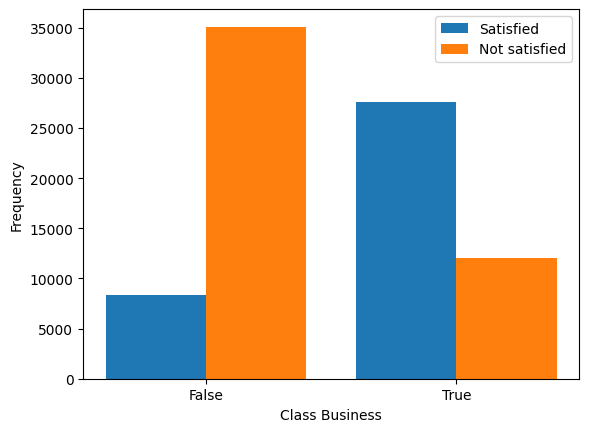

In [11]:
X_axis = np.arange(2)
entertain_good = combined_train_df[combined_train_df['satisfaction_satisfied'] == 1]['Class_Business'].value_counts().sort_index().tolist()
entertain_bad = combined_train_df[combined_train_df['satisfaction_satisfied'] == 0]['Class_Business'].value_counts().sort_index().tolist()

pyplot.bar(X_axis - 0.2, entertain_good, 0.4, label = "Satisfied")
pyplot.bar(X_axis + 0.2, entertain_bad, 0.4, label = "Not satisfied")
pyplot.xlabel("Class Business")
pyplot.ylabel("Frequency")
pyplot.xticks(X_axis, ['False', 'True'])
pyplot.legend()

*The graph indicates that people who flew in business class were on average more satisfied than those who did not.*

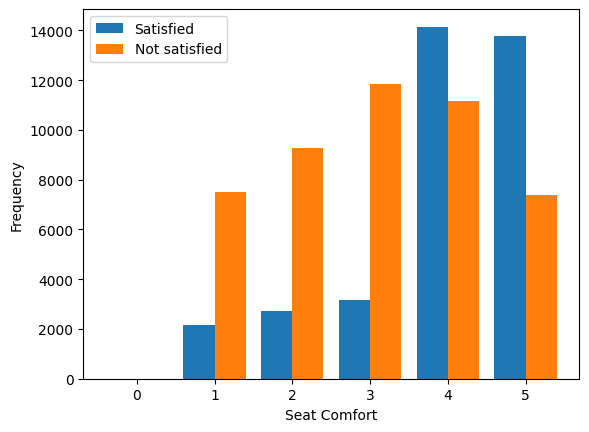

In [12]:
X_axis = np.arange(6)
entertain_good = combined_train_df[combined_train_df['satisfaction_satisfied'] == 1]['Seat comfort'].value_counts().sort_index().tolist()
entertain_bad = combined_train_df[combined_train_df['satisfaction_satisfied'] == 0]['Seat comfort'].value_counts().sort_index().tolist()
entertain_good.insert(0,0)

pyplot.bar(X_axis - 0.2, entertain_good, 0.4, label = "Satisfied")
pyplot.bar(X_axis + 0.2, entertain_bad, 0.4, label = "Not satisfied")
pyplot.xlabel("Seat Comfort")
pyplot.ylabel("Frequency")
pyplot.legend()

*The graph indicates that there is a clear correlation between seat comfort and overall satisfaction. The more comfortable the seat, the more likely the customer is to be satisfied.*

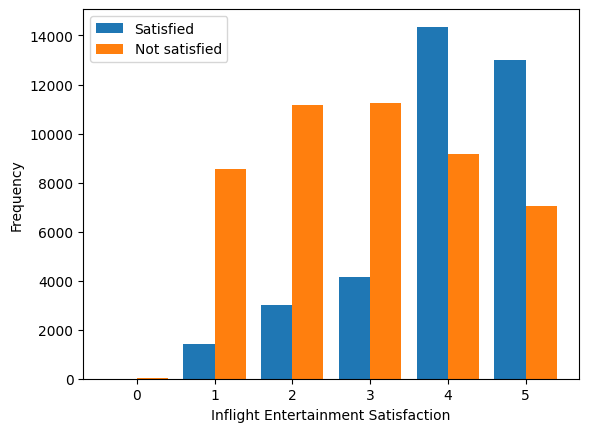

In [13]:
X_axis = np.arange(6)
entertain_good = combined_train_df[combined_train_df['satisfaction_satisfied'] == 1]['Inflight entertainment'].value_counts().sort_index().tolist()
entertain_bad = combined_train_df[combined_train_df['satisfaction_satisfied'] == 0]['Inflight entertainment'].value_counts().sort_index().tolist()
entertain_good.insert(0,0)

pyplot.bar(X_axis - 0.2, entertain_good, 0.4, label = "Satisfied")
pyplot.bar(X_axis + 0.2, entertain_bad, 0.4, label = "Not satisfied")
pyplot.xlabel("Inflight Entertainment Satisfaction")
pyplot.ylabel("Frequency")
pyplot.legend()

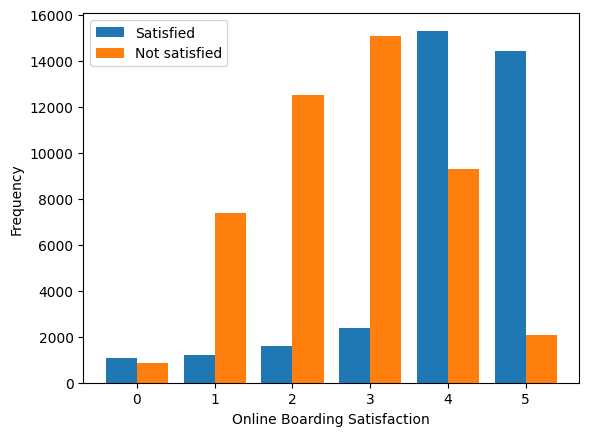

In [14]:
X_axis = np.arange(6)
boarding_good = combined_train_df[combined_train_df['satisfaction_satisfied'] == 1]['Online boarding'].value_counts().sort_index().tolist()
boarding_bad = combined_train_df[combined_train_df['satisfaction_satisfied'] == 0]['Online boarding'].value_counts().sort_index().tolist()
pyplot.bar(X_axis - 0.2, boarding_good, 0.4, label = "Satisfied")
pyplot.bar(X_axis + 0.2, boarding_bad, 0.4, label = "Not satisfied")
pyplot.xlabel("Online Boarding Satisfaction")
pyplot.ylabel("Frequency")
pyplot.legend()

*The side-by-side bar charts show that there is a noticeable correlation between online boarding satisfaction and overall satisfaction as well as inflight entertainment satisfaction and overall satisfaction. People who were satisfied overall are more likely to give a high rating in these categories while people who were neutral or not satisfied overall are more likely to give mid to lower ratings in these categories.*

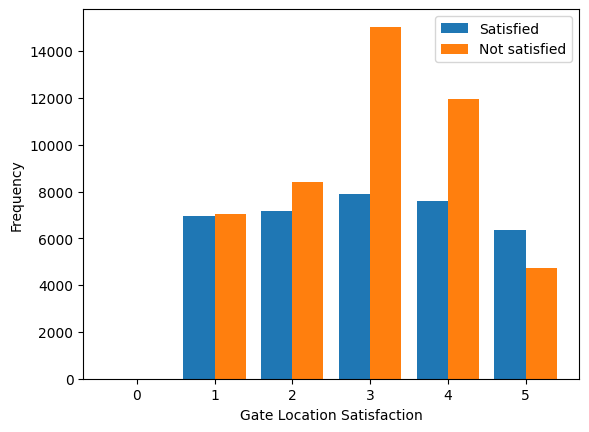

In [15]:
X_axis = np.arange(6)
gate_good = combined_train_df[combined_train_df['satisfaction_satisfied'] == 1]['Gate location'].value_counts().sort_index().tolist()
gate_bad = combined_train_df[combined_train_df['satisfaction_satisfied'] == 0]['Gate location'].value_counts().sort_index().tolist()
gate_bad.insert(0,0)
pyplot.bar(X_axis - 0.2, gate_good, 0.4, label = "Satisfied")
pyplot.bar(X_axis + 0.2, gate_bad, 0.4, label = "Not satisfied")
pyplot.xlabel("Gate Location Satisfaction")
pyplot.ylabel("Frequency")
pyplot.legend()

*There doesn't seem to be as strong of a correlation/pattern between satisfaction of gate location and overall satisfaction. For all customers who were satisfied overall, the distribution of satisfaction with gate location is relatively equal across 1-5. The higher number of 3s and 4s for customers who were not satisfied can be attributed to the class imbalance of overall satisfaction - more customers were neutral or dissatisfied than satisfied, so the peak in 3s and 4s ratings of gate location satisfaction from not-satisfied customers is merely because there are more of them.*

<h3>2.4 Visualizing Satisfaction with Continuous Features</h3>

In [16]:
continuous_df = combined_train_df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
pd.DataFrame.corr(continuous_df)

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.101929,-0.009716,-0.011506
Flight Distance,0.101929,1.000000,0.003245,-0.001307
Departure Delay in Minutes,-0.009716,0.003245,1.000000,0.961775
Arrival Delay in Minutes,-0.011506,-0.001307,0.961775,1.000000


Correlation:  0.9617754454627354


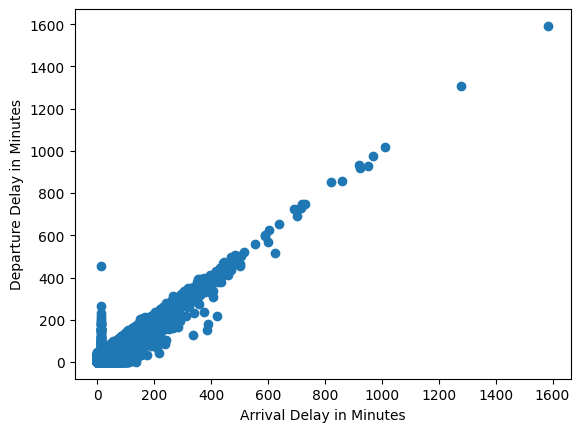

In [17]:
arrival = combined_train_df['Arrival Delay in Minutes']
departure = combined_train_df['Departure Delay in Minutes']
plt.scatter(arrival, departure)
plt.xlabel("Arrival Delay in Minutes")
plt.ylabel("Departure Delay in Minutes")
print("Correlation: ", arrival.corr(departure))

*The correlation table of continuous variables and the above scatter plot indicate that arrival and departure delay are highly correlated, which we can take advantage of in feature engineering.*

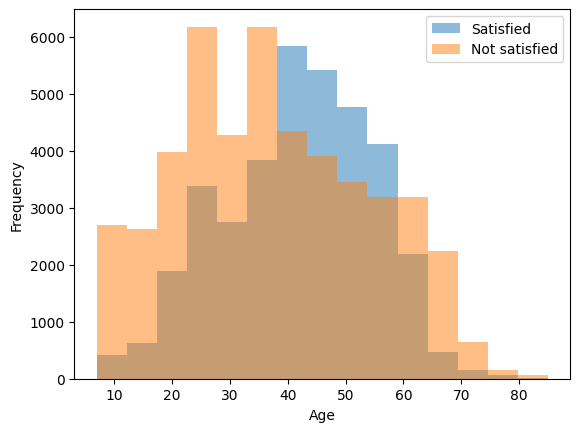

In [18]:
age_good = combined_train_df[combined_train_df['satisfaction_satisfied'] == 1]['Age']
age_bad = combined_train_df[combined_train_df['satisfaction_satisfied'] == 0]['Age']

plt.hist(age_good, bins=15, alpha=0.5, label='Satisfied')
plt.hist(age_bad, bins=15, alpha=0.5, label='Not satisfied')
plt.legend(loc='upper right')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

*The graph indicates that younger people are more likely to be not satisfied compared to middle-aged people.*

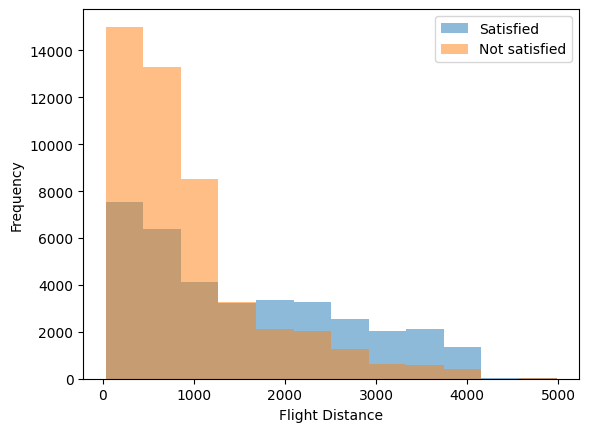

In [19]:
dist_good = combined_train_df[combined_train_df['satisfaction_satisfied'] == 1]['Flight Distance']
dist_bad = combined_train_df[combined_train_df['satisfaction_satisfied'] == 0]['Flight Distance']

plt.hist(dist_good, bins=12, alpha=0.5, label='Satisfied')
plt.hist(dist_bad, bins=12, alpha=0.5, label='Not satisfied')
plt.legend(loc='upper right')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.show()

*The graph indicates that people who flew further were more likely to be satisfied.*

**We notice that there is a heavy skew in the distribution of flight distance and satisfcation, so we analyze outliers.**

[Text(0.5, 0, 'Satisfaction')]

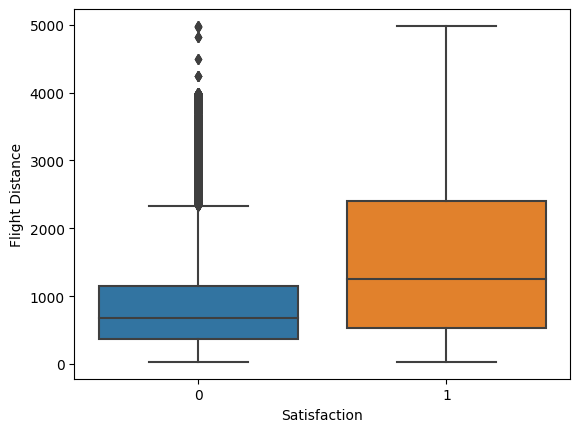

In [20]:
sns.boxplot(x = "satisfaction_satisfied", y = "Flight Distance", data=combined_train_df).set(xlabel = "Satisfaction")

In [21]:
# Outliers in Flight Distance column
outliers = dist_bad[dist_bad > 4000]
print("Number of outliers: ", len(outliers))
print("Proportion of outliers: ", len(outliers)/len(dist_bad))

Number of outliers:  19
Proportion of outliers:  0.00040283254886994867


*Since a very small proportion of the data in the flight distance column can be considered extreme outliers, these values will not have a huge impact on our data and we shall keep them to preserve the dataset's natural variance.*

<h2>3. Feature Engineering</h2>
<h3>3.1: Create New Features</h3>

In [9]:
#Create new features of the dataset
#Average satisfaction might be a good feature in lieu of the 12 satisfaction columns.
combined_train_df['avg_satisfactions'] = (combined_train_df['Food and drink'] + combined_train_df['Inflight entertainment'] + combined_train_df['Gate location'] + combined_train_df['Seat comfort'] + combined_train_df['Ease of Online booking'] + combined_train_df['Online boarding'] + combined_train_df['On-board service'] + combined_train_df['Leg room service'] + combined_train_df['Baggage handling'] + combined_train_df['Checkin service'] + combined_train_df['Inflight service'] + combined_train_df['Cleanliness'])/12

#Binning the age column because of data we collected earlier about young people being less likely to be satisfied
combined_train_df['Age_bins'] = combined_train_df['Age'].apply(lambda x: 0 if x < 30 else 1 if x < 40 else 2 if x < 50 else 3 if x < 60 else 4)

<h3>3.2 Check for Unncessary Features</h3>

In [10]:
# Check for low variance in columns
combined_train_df.var().sort_values()

Customer Type_Loyal Customer              0.149471
Type of Travel_Personal Travel            0.214271
satisfaction_satisfied                    0.245457
Class_Business                            0.249466
Gender_Male                               0.249961
avg_satisfactions                         0.456022
Inflight service                          1.380820
Baggage handling                          1.395887
Checkin service                           1.600377
Gate location                             1.629589
On-board service                          1.657358
Cleanliness                               1.719543
Leg room service                          1.727557
Seat comfort                              1.740464
Food and drink                            1.762471
Inflight wifi service                     1.762939
Age_bins                                  1.765344
Inflight entertainment                    1.773334
Online boarding                           1.821080
Ease of Online booking         

*No columns have unusally low variances. The only columns with seemingly low variances are the binary/ordinal columns, so it is normal for them to have low variances.*

In [11]:
# Test for independence of gate location and overall satisfaction
chisqt = pd.crosstab(combined_train_df['Gate location'], y_train, margins = True)
table = np.array(chisqt.iloc[0:6, 0:2].values)
print(table)

result = chi2_contingency(table, lambda_="log-likelihood")
print("Statistic: ", result[0])
print("P-value: ", result[1])

[[    0     1]
 [ 7032  6962]
 [ 8407  7166]
 [15041  7883]
 [11953  7576]
 [ 4733  6369]]
Statistic:  2088.8551892393652
P-value:  0.0


*When performing data exploration, the side-by-side bar plot showed that gate location satisfaction did not seem to have a significant relationship/correlation with overall satisfaction. However, since the chi-squared test yielded a small p-value (under the null hypothesis that the variables are independent), we reject the null hypothesis and conclude that the variables are dependent.*\
**Based on the chi-squared test for independence, we do not drop the gate location feature.**

<h3>3.2 Scaling and PCA</h3>

In [12]:
# Feature scaling: normalization/standardization
scaler = StandardScaler().fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_train_data = pd.DataFrame(scaled_train, columns=X_train.columns)
scaled_train_data.head(5)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel,Class_Business
0,1.299867,-0.143103,0.956377,1.271553,0.887405,-1.549472,1.354730,0.558180,1.185329,-1.017279,...,-0.532883,1.339119,-1.395033,0.547515,-0.074078,-0.313709,-0.987150,0.473171,1.488528,-0.954673
1,0.043551,-0.438007,0.956377,0.616850,0.887405,-0.766108,-1.658287,0.558180,1.185329,-1.768222,...,0.313521,-0.241843,1.157994,-1.740281,0.107766,0.354302,-0.987150,-2.113400,-0.671805,1.047479
2,1.696598,-0.808142,-0.549931,-0.037854,-0.542403,-1.549472,-1.658287,-0.923888,-1.846677,-1.768222,...,1.159924,1.339119,1.157994,-1.740281,-0.385812,-0.390787,1.013017,0.473171,1.488528,-0.954673
3,2.027207,1.053565,0.203223,1.271553,0.172501,0.800620,-0.151778,1.299214,0.427327,1.235552,...,1.159924,-0.241843,1.157994,1.310114,-0.385812,-0.390787,-0.987150,0.473171,1.488528,-0.954673
4,-0.948277,0.169856,-0.549931,-0.692557,-0.542403,0.017256,-1.658287,-0.923888,-1.846677,-1.768222,...,-0.532883,1.339119,-1.395033,-1.740281,-0.307879,-0.005396,-0.987150,-2.113400,-0.671805,-0.954673


In [13]:
print("Means for All Columns")
print(scaled_train_data.mean())

print("\nStandard Deviations for All Columns")
print(scaled_train_data.std())

Means for All Columns
Age                                 -1.055956e-17
Flight Distance                     -5.182412e-17
Inflight wifi service                1.026345e-16
Departure/Arrival time convenient    9.376612e-16
Ease of Online booking               7.439949e-16
Gate location                        2.250631e-16
Food and drink                      -1.491892e-15
Online boarding                      4.694289e-16
Seat comfort                        -4.627134e-16
Inflight entertainment              -1.577028e-15
On-board service                     8.180768e-16
Leg room service                     3.199923e-17
Baggage handling                    -5.233380e-16
Checkin service                     -2.756473e-15
Inflight service                    -7.848013e-16
Cleanliness                          8.028298e-16
Departure Delay in Minutes           9.016029e-16
Arrival Delay in Minutes            -7.433898e-16
Gender_Male                          5.140633e-16
Customer Type_Loyal Customer

*Our standard deviations and means are now very close to 1 and 0 respectively, so we can proceed with PCA.*

In [14]:
# We chose to reduce the dataset size as we have a lot of un-helpful features that don't have a strong correlation with the label
# satisfaction_satisfied.
pca = PCA(n_components=0.95, svd_solver='full')
fitted_pca = pca.fit(scaled_train)
transform = fitted_pca.transform(scaled_train)
pca_data = pd.DataFrame(transform)
print("Number of components: ", pca.n_components_)
print("Explained variance: ", pca.explained_variance_ratio_)

Number of components:  17
Explained variance:  [0.18607828 0.10808437 0.10012151 0.08946963 0.0833212  0.06793848
 0.04633443 0.04389146 0.04246406 0.03724706 0.03160559 0.02295042
 0.02184587 0.02084908 0.0191624  0.01674263 0.01462843]


*From this we can see that our first 4 principal components explain 50% of the variance in our data and all of our principal components explain 95% of the variance in our data.*

In [16]:
# Scaling test data
scaled_test = scaler.transform(X_test)
scaled_test_data = pd.DataFrame(scaled_test, columns=X_test.columns)

# Transforming test data
transformed_test = fitted_pca.transform(scaled_test_data)
pca_data_test = pd.DataFrame(transformed_test)
pca_data_test.head(5)

/Users/katezhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.597025,0.445625,-0.118678,-1.206940,2.937785,0.251137,-0.179809,2.218480,0.178247,-0.185685,-0.313154,-0.287757,0.422496,0.882328,0.287146,0.378102,-0.455396
1,1.055296,-2.498477,1.327105,-0.301463,-0.645381,0.915135,-1.654860,0.613215,-0.754642,0.054397,1.054215,-1.692718,-0.856787,-0.623394,-0.546561,0.197453,0.320731
2,1.162072,1.034433,0.123359,0.146257,1.955031,-1.326219,1.050652,0.414280,0.587874,-1.355886,1.653140,-0.145615,-0.233134,0.458483,0.532250,0.050437,0.267155
3,0.692196,0.350494,0.807796,-0.564026,1.993417,0.114370,-0.242392,1.937783,1.093797,0.293771,0.920950,-0.041967,-0.651639,0.453742,0.248477,0.020762,-0.274318
4,2.179651,1.371234,0.861928,-0.184686,-1.895388,1.339432,-0.752820,-0.789753,-0.288069,-0.167562,0.450226,-0.073526,0.046337,-1.204935,1.275570,-0.503480,0.169093


*Our PCA has reduced our number of features to 16, which is a significant reduction from the original 23 features.*

*Thus, we conclude this section of our feature engineering.*

<h2>4. Clustering</h2>

<h3>4.1 DBScan</h3>

In [ ]:
def scatter(data, labels, numPoints = 10000):

    numEntries = data.shape[0]
    start = random.randint(0, numEntries - numPoints)
    end = start + numPoints
    data = data.iloc[start:end, :]
    labels = labels.iloc[start:end]
    
    mds = MDS(n_components=2)
    mds_data = mds.fit_transform(data)
    plt.scatter(mds_data[:, 0], mds_data[:, 1], c=labels, s=50)
    plt.show()

scatter(pca_data, y_train)

Output:
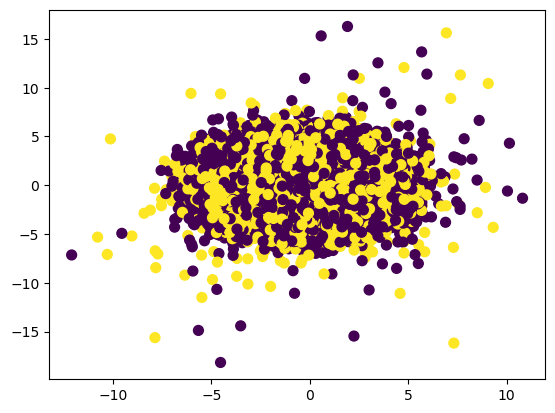

In [ ]:
# Find DBScan nearest neighbors

neigh = NearestNeighbors(n_neighbors=6)
neigh.fit(pca_data)
distances,indices = neigh.kneighbors(pca_data)

sorted_distances = sorted(distances, key=lambda x:x[5])
plt.plot(sorted_distances)
plt.show()

Output:
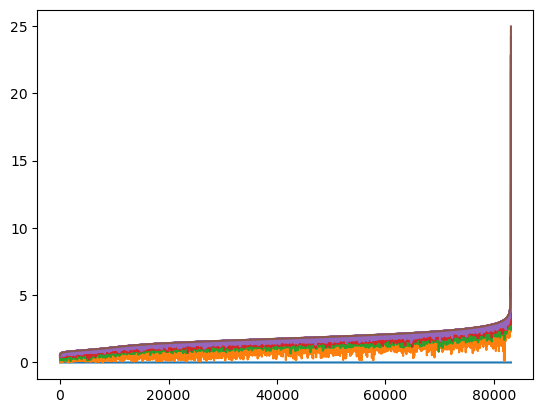

In [ ]:
# DBScan
db_scan = DBSCAN(min_samples=4, eps=3)
dbscan_labels = db_scan.fit_predict(pca_data)

labels_series = pd.Series(dbscan_labels)
scatter(pca_data, labels_series)

Output:
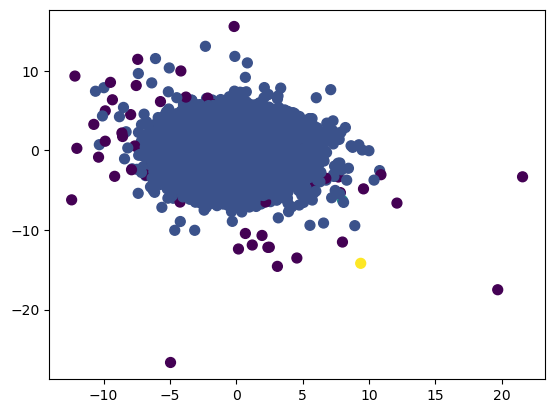

<h3>4.2 Hierarchial Clustering</h3>

(832, 17)
Single =  0.7329696799033115
Complete =  0.6582051856691857
Average =  0.7759370756285814
Centroid =  0.7465065951919121
Ward =  0.33447270395876133


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [40.0, 40.0, 62.5, 62.5],
  [95.0, 95.0, 105.0, 105.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [100.0, 100.0, 123.75, 123.75],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [155.0, 155.0, 180.0, 180.0],
  [215.0, 215.0, 225.0, 225.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [242.5, 242.5, 272.5, 272.5],
  [220.0, 220.0, 257.5, 257.5],
  [205.0, 205.0, 238.75, 238.75],
  [167.5, 167.5, 221.875, 221.875],
  [111.875, 111.875, 194.6875, 194.6875],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [335.0, 335.0, 345.0, 345.0],
  [355.0, 355.0, 365.0, 365.0],
  [340.0, 340.0, 360.0, 360.0],
  [325.0, 325.0, 350.0, 350.0],
  [385.0, 385.0, 395.0, 395.0],
  

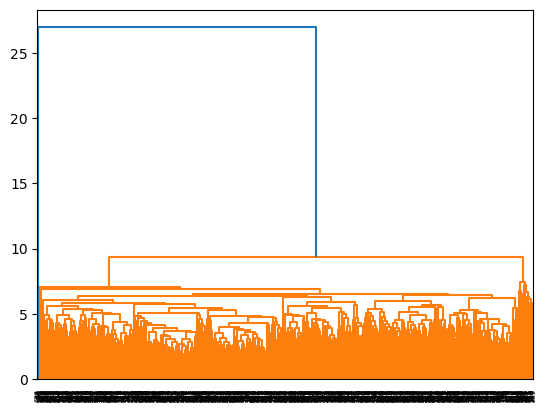

In [ ]:
def downsample_data(data, labels):
    downData = None
    downLabels = None

    kfold = StratifiedKFold(n_splits = 100, shuffle = False)
    for throwAway_index, subsample_index in kfold.split(data, labels):
        downData = data.iloc[subsample_index]
        downLabels = labels.iloc[subsample_index]
        break
    
    print(downData.shape)
    return downData


# Downsample data for proximity matrix
sampled_dataset = downsample_data(pca_data, y_train)
# Pass the down-sampled dataset into pdist to get your proximity matrix for calculating CPCC
proximity_matrix = pdist(sampled_dataset)

# trying different hierarchial clustering methods
single = linkage(sampled_dataset, 'single')
complete = linkage(sampled_dataset, 'complete')
average = linkage(sampled_dataset, 'average')
centroid = linkage(sampled_dataset, 'centroid')
ward = linkage(sampled_dataset, 'ward')

print("Single = ", cophenet(single, pdist(sampled_dataset))[0])
print("Complete = ", cophenet(complete, pdist(sampled_dataset))[0])
print("Average = ", cophenet(average, pdist(sampled_dataset))[0])
print("Centroid = ", cophenet(centroid, pdist(sampled_dataset))[0])
print("Ward = ", cophenet(ward, pdist(sampled_dataset))[0])

### Results ###
# Single =  0.7329696799033115
# Complete =  0.6582051856691857
# Average =  0.7759370756285814
# Centroid =  0.7465065951919121
# Ward =  0.33447270395876133

dendrogram(average)

Output:
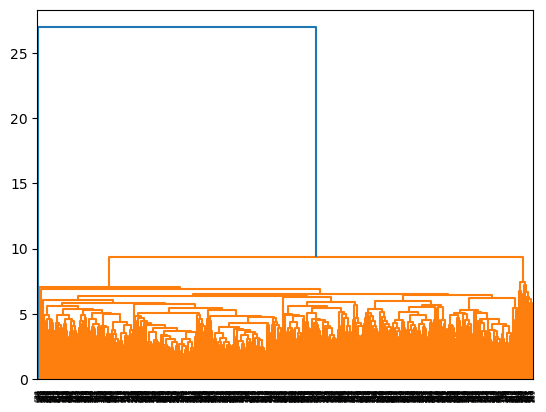

<h2>5. Modeling</h2>

<h3>5.1 Linear Regression Modeling</h3>

In [21]:
reg = LinearRegression()
reg.fit(pca_data, y_train)
print("slope = ", reg.coef_, "\n")
print("intercept =", reg.intercept_)

slope =  [-0.14990517  0.00896066 -0.00781036  0.02433572 -0.11534456 -0.02025386
  0.01978645 -0.0404052   0.00153417  0.02730913 -0.00496812 -0.09984916
  0.00813354  0.03483591 -0.03805748 -0.00991756  0.07992919] 

intercept = 0.4325758213731458


In [22]:
# Regression Evaluation
y_test_preds = reg.predict(pca_data_test)

print("MAE = ", metrics.mean_absolute_error(y_true=y_test, y_pred=y_test_preds))
print("MSE = ", metrics.mean_squared_error(y_true=y_test, y_pred=y_test_preds))
print("RMSE = ", metrics.mean_squared_error(y_true=y_test, y_pred=y_test_preds, squared=False))
print("R2 = ", metrics.r2_score(y_true=y_test, y_pred=y_test_preds))

MAE =  0.2599151580632687
MSE =  0.11558778101326996
RMSE =  0.3399820304270065
R2 =  0.5300353887020863


In [36]:
all_features = pd.concat([X_train, X_test])
all_labels = pd.concat([y_train, y_test])

r2_scores = cross_val_score(reg, all_features, all_labels, cv=5)
r2_scores_avg = sum(r2_scores) / len(r2_scores)
print("Average accuracy: ", r2_scores_avg)

Average accuracy:  0.5520590675962456


<h3>5.2 Logistic Regression Modeling</h3>

In [70]:
log_clf = LogisticRegression().fit(pca_data, y_train)
log_preds = log_clf.predict(pca_data_test)

In [27]:
# Confusion matrix
log_matrix = metrics.confusion_matrix(y_test, log_preds)
print("Confusion matrix: \n", log_matrix, "\n")

TP = log_matrix[1, 1]
TN = log_matrix[0, 0]
FP = log_matrix[0, 1]
FN = log_matrix[1, 0]

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Accuracy: ", (TP + TN) / len(log_preds))
print("Specificity (TNR): ", TN / (TN + FP))
print("Recall (TPR): ", recall, "\n")
print("Precision: ", precision)

f_measure = 2 * precision * recall / (precision + recall)
print("F-measure: ", f_measure, "\n")

print("FPR (Type I Error): ", FP / len(log_preds))
print("FNR (Type II Error): ", FN / len(log_preds))

Confusion matrix: 
 [[10477  1236]
 [ 1532  7536]] 

Accuracy:  0.8668014051296857
Specificity (TNR):  0.8944762230000853
Recall (TPR):  0.8310542567269519 

Precision:  0.8590971272229823
F-measure:  0.8448430493273542 

FPR (Type I Error):  0.059477407247004475
FNR (Type II Error):  0.07372118762330976


In [29]:
ss = StandardScaler()
pca = PCA()
log_clf = LogisticRegression()
log_pipe = Pipeline(steps = [('StandardScaler', ss), ('PCA', pca), ('LogReg', log_clf)])
log_cv = cross_val_score(log_pipe, all_features, all_labels, cv = 5)

print("Average accuracy: ", log_cv.mean())

Average accuracy:  0.8749903964340714


In [71]:
# ROC score
log_prob = log_clf.predict_proba(pca_data_test)[:,1]
log_auc = metrics.roc_auc_score(y_test, log_prob)
print("AUC score: ", log_auc)

log_roc = metrics.roc_curve(y_true=y_test, y_score=log_prob)
log_fpr, log_tpr = log_roc[0], log_roc[1]

AUC score:  0.922617075624786


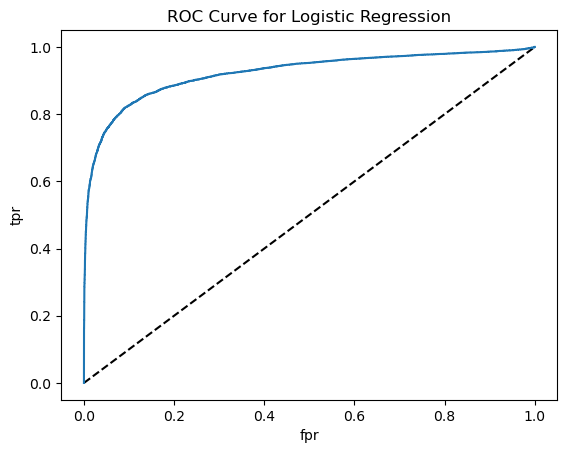

In [72]:
# ROC curve
plt.plot([0,1],[0,1],'k--')
plt.plot(log_fpr, log_tpr, label='LogReg')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve for Logistic Regression')
plt.show()

<h3>5.3 Decision Tree</h3>

In [40]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=500, min_samples_leaf=20)
clf.fit(pca_data, y_train)
y_pred = clf.predict(pca_data_test)
print("Average accuracy: ", metrics.accuracy_score(y_test, y_pred))

Average accuracy:  0.901207834079207


In [39]:
# Check accuracy using cross validation score
clf = DecisionTreeClassifier()
accuracy = cross_val_score(clf, all_features, all_labels, cv=10)
print("Average accuracy: ", np.mean(accuracy))

0.946518008245271


In [43]:
# Tuning hyperparameters using a grid search
params = {"max_depth": [50,100,500] , "min_samples_leaf": [10,15,20,25], "max_features": [5,10,15,20]}
grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy')
grid_search.fit(all_features, all_labels)

print(grid_search.best_params_)
print("Accuracy =", grid_search.best_score_)

{'max_depth': 500, 'max_features': 20, 'min_samples_leaf': 15}
Accuracy = 0.9535051679462698


In [44]:
# Nested cross validation
cross_val_score(grid_search, all_features, all_labels, cv=10).mean()

0.9526679016017507

<h3>5.4 KNN</h3>

In [5]:
pipe = Pipeline(steps=([('scaler', StandardScaler()), ('pca', PCA()), ('knn',KNeighborsClassifier(n_neighbors=10))]))

param_grid = {
    'pca__n_components': list(range(5, 19)),
    'knn__n_neighbors': list(range(1, 25))
}


grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print("Accuracy =", grid_search.best_score_)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
accuracy = cross_val_score(grid_search, X_train, y_train, cv=5)
print("Accuracy =", np.mean(accuracy))

<h3>5.5 Naive Bayes</h3>

In [64]:
naive_bayes = GaussianNB()
naive_bayes.fit(pca_data, y_train)
accuracy = cross_val_score(naive_bayes, all_features, all_labels, cv=10)
print("Accuracy =", np.mean(accuracy))

Accuracy = 0.8648079587641966


In [65]:
# Confusion matrix
naive_pred = cross_val_predict(naive_bayes, all_features, all_labels, cv=10)
print("Confusion matrix: \n", metrics.confusion_matrix(y_pred=naive_pred, y_true=all_labels), "\n")
print("Classification report: \n", metrics.classification_report(y_pred=naive_pred, y_true=all_labels))

Confusion matrix: 
 [[52879  6000]
 [ 8047 36978]] 

Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.90      0.88     58879
           1       0.86      0.82      0.84     45025

    accuracy                           0.86    103904
   macro avg       0.86      0.86      0.86    103904
weighted avg       0.86      0.86      0.86    103904



In [73]:
# ROC score
naive_prob = naive_bayes.predict_proba(pca_data_test)[:,1]
naive_auc = metrics.roc_auc_score(y_test, naive_prob)
print("AUC score: ", naive_auc)

n_curve = metrics.roc_curve(y_true=y_test, y_score=naive_prob)
n_fpr, n_tpr = n_curve[0], n_curve[1]

AUC score:  0.8954861606837037


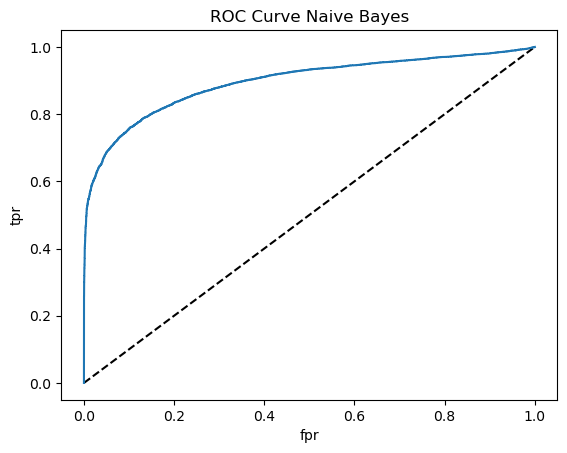

In [74]:
# ROC curve
plt.plot([0,1],[0,1],'k--')
plt.plot(n_fpr, n_tpr, label='NB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.show()

<h3>5.6 Neural Networks</h3>

In [ ]:
features = pd.concat([X_train, X_test])
label = pd.concat([y_train, y_test])

def run_nn():
  nn = sklearn.neural_network.MLPClassifier()
  ss = sklearn.preprocessing.StandardScaler()
  pipe = sklearn.pipeline.Pipeline(steps=[('StandardScaler', ss), ('NN', nn)])
  param_grid = {
      'NN__hidden_layer_sizes': [30, 40, 50, 60],
      'NN__activation': ['logistic', 'tanh', 'relu']
  }
  gs = sklearn.model_selection.GridSearchCV(param_grid=param_grid, estimator=pipe, cv=5)
  cv_score = sk.model_selection.cross_val_score(gs, features, y=label, cv=5)
  print("Accuracy = ", cv_score.mean())
run_nn()

<h3>5.6 Ensemble Methods</h3>

In [ ]:
# Random forest, etc.

<h2>6. Evaluation</h2>

Talk about the entire process. This includes (in order) the data cleaning, data exploration, feature engineering, clustering, and modeling. Talk about what we did and why. Finish by discussing the results of the models, what the best model was, and why.